In [1]:
import numpy as np
import pandas as pd
import time 
import datetime as datetime
import glob
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
np.random.seed(1)

In [5]:
name = pd.read_csv('TickFull/LP-1-STRM-1-AUDUSD-1555559440547.csv')
col_names = list(name.columns.values)
Full = pd.DataFrame(columns = col_names)
for filename in glob.glob("TickFull/*.csv"):
    print(filename)
    tmp = pd.read_csv(filename)
    Full = Full.append(tmp)

TickFull/LP-4-STRM-4-USDJPY-1555561117485.csv
TickFull/LP-3-STRM-3-GBPUSD-1555561716858.csv
TickFull/LP-4-STRM-4-EURUSD-1555560356853.csv
TickFull/LP-3-STRM-3-USDJPY-1555561880193.csv
TickFull/LP-3-STRM-3-USDCHF-1555561804604.csv
TickFull/LP-5-STRM-5-USDCAD-1555563700739.csv
TickFull/LP-1-STRM-1-AUDUSD-1555559440547.csv
TickFull/LP-4-STRM-4-AUDUSD-1555560746162.csv
TickFull/LP-5-STRM-5-NZDUSD-1555563894595.csv
TickFull/LP-5-STRM-5-USDSEK-1555564861583.csv
TickFull/LP-3-STRM-3-NZDUSD-1555561546373.csv
TickFull/LP-1-STRM-1-USDJPY-1555559972840.csv
TickFull/LP-3-STRM-3-USDSEK-1555561964602.csv
TickFull/LP-2-STRM-2-AUDUSD-1555562589324.csv
TickFull/LP-2-STRM-2-GBPUSD-1555562776567.csv
TickFull/LP-4-STRM-4-NZDUSD-1555560626511.csv
TickFull/LP-1-STRM-1-USDCHF-1555559809725.csv
TickFull/LP-3-STRM-3-AUDUSD-1555561631303.csv
TickFull/LP-1-STRM-1-GBPUSD-1555559614083.csv
TickFull/LP-3-STRM-3-EURUSD-1555561351337.csv
TickFull/LP-2-STRM-2-USDCHF-1555562966929.csv
TickFull/LP-5-STRM-5-GBPUSD-155556

In [6]:
Full.to_csv('FullData.csv',index=False)

In [10]:
col_names = [0,1,2,3]
onemonth = pd.DataFrame(columns = col_names)
for filename in glob.glob("TrueFX/*.csv"):
    print(filename)
    tmp = pd.read_csv(filename,header=None)
    onemonth = onemonth.append(tmp)
onemonth = onemonth.rename(index=str, columns={0:'CCY', 1:'Timestep', 2:'Bid', 3: 'Ask'})
onemonth.to_csv('TrueFX.csv')

TrueFX/EURJPY-2019-03.csv
TrueFX/AUDNZD-2019-03.csv
TrueFX/GBPJPY-2019-03.csv
TrueFX/EURCHF-2019-03.csv
TrueFX/GBPUSD-2019-03.csv
TrueFX/CADJPY-2019-03.csv
TrueFX/CHFJPY-2019-03.csv
TrueFX/EURUSD-2019-03.csv
TrueFX/AUDJPY-2019-03.csv
TrueFX/USDCHF-2019-03.csv
TrueFX/AUDUSD-2019-03.csv
TrueFX/USDCAD-2019-03.csv
TrueFX/NZDUSD-2019-03.csv
TrueFX/USDJPY-2019-03.csv


In [12]:
name = pd.read_csv('TickData/LP-1-STRM-1-AUDUSD.csv')
col_names = list(name.columns.values)
LP = pd.DataFrame(columns = col_names)
for filename in glob.glob("TickData/*.csv"):
    print(filename)
    tmp = pd.read_csv(filename)
    LP = LP.append(tmp)
LP.to_csv('Integral.csv')

TickData/LP-3-STRM-3-USDCAD.csv
TickData/LP-5-STRM-5-USDCHF.csv
TickData/LP-1-STRM-1-USDCAD.csv
TickData/LP-5-STRM-5-EURUSD.csv
TickData/LP-4-STRM-4-NZDUSD.csv
TickData/LP-2-STRM-2-EURUSD.csv
TickData/LP-2-STRM-2-USDCHF.csv
TickData/LP-4-STRM-4-USDCAD.csv
TickData/LP-3-STRM-3-NZDUSD.csv
TickData/LP-1-STRM-1-NZDUSD.csv
TickData/LP-1-STRM-1-AUDUSD.csv
TickData/LP-3-STRM-3-GBPUSD.csv
TickData/LP-1-STRM-1-GBPUSD.csv
TickData/LP-3-STRM-3-AUDUSD.csv
TickData/LP-2-STRM-2-USDJPY.csv
TickData/LP-5-STRM-5-USDSEK.csv
TickData/LP-4-STRM-4-AUDUSD.csv
TickData/LP-4-STRM-4-GBPUSD.csv
TickData/LP-2-STRM-2-USDSEK.csv
TickData/LP-5-STRM-5-USDJPY.csv
TickData/LP-4-STRM-4-USDCHF.csv
TickData/LP-2-STRM-2-USDCAD.csv
TickData/LP-4-STRM-4-EURUSD.csv
TickData/LP-5-STRM-5-NZDUSD.csv
TickData/LP-1-STRM-1-USDCHF.csv
TickData/LP-3-STRM-3-EURUSD.csv
TickData/LP-5-STRM-5-USDCAD.csv
TickData/LP-3-STRM-3-USDCHF.csv
TickData/LP-1-STRM-1-EURUSD.csv
TickData/LP-2-STRM-2-NZDUSD.csv
TickData/LP-2-STRM-2-GBPUSD.csv
TickData

In [23]:
LP['time'] = pd.to_datetime(LP['time'])
LP.head()

,provider,stream,currency pair,time,bid price,bid volume,ask price,ask volume,guid,tier,status,quote type
0,LP-3,STRM-3,USDCAD,2019-02-01 00:00:00.130,1.31266,1000000,1.31278,1000000,G-3c369d52-168a65ae082-LP-3Z-9a914,1,Active,MQ
1,LP-3,STRM-3,USDCAD,2019-02-01 00:00:00.130,1.31267,1000000,1.31278,1000000,G-3c369d52-168a65ae082-LP-3Z-9a915,1,Active,MQ
2,LP-3,STRM-3,USDCAD,2019-02-01 00:00:00.150,1.31267,1000000,1.31281,1000000,G-3c369d52-168a65ae096-LP-3Z-9a916,1,Active,MQ
3,LP-3,STRM-3,USDCAD,2019-02-01 00:00:00.150,1.31271,1000000,1.31281,1000000,G-3c369d52-168a65ae096-LP-3Z-9a917,1,Active,MQ
4,LP-3,STRM-3,USDCAD,2019-02-01 00:00:00.211,1.31270,1000000,1.31281,1000000,G-3c369d52-168a65ae0d3-LP-3Z-9a918,1,Active,MQ


### Integral data

In [2]:
LP = pd.read_csv('Integral.csv')
LP = LP.drop(columns=['Unnamed: 0'])
LP['time'] = pd.to_datetime(LP['time'])

In [3]:
providers = LP.provider.unique()
CCY = LP['currency pair'].unique()
print(providers)
print(CCY)

['LP-3' 'LP-5' 'LP-1' 'LP-4' 'LP-2']
['USDCAD' 'USDCHF' 'EURUSD' 'NZDUSD' 'AUDUSD' 'GBPUSD' 'USDJPY' 'USDSEK']


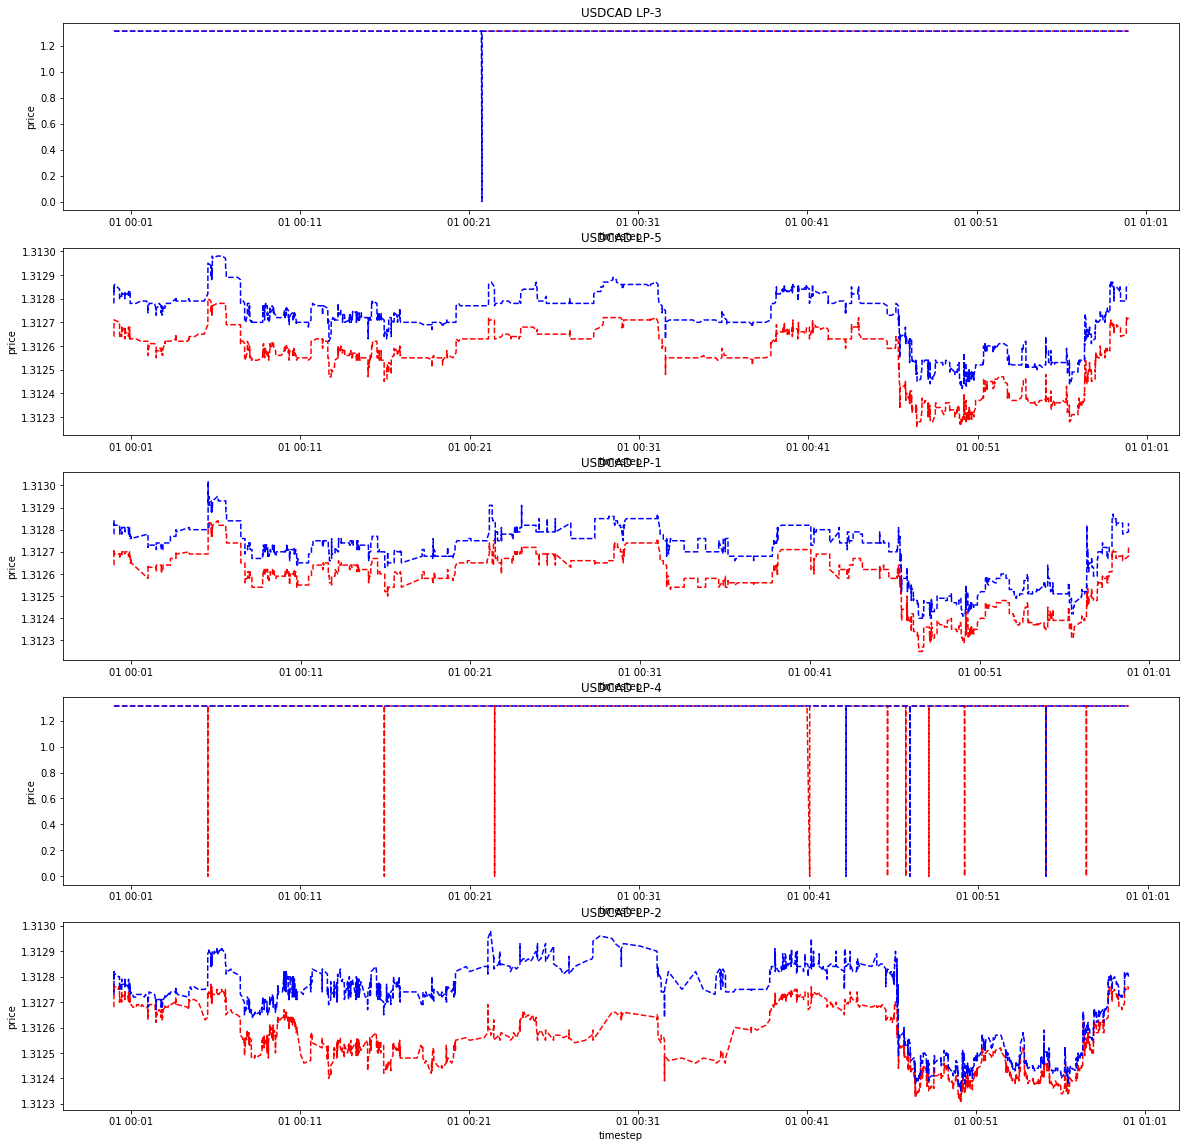

In [36]:
cur = 'USDCAD'
fig = plt.figure()
gs = gridspec.GridSpec(len(providers),1)
for n in range(len(providers)):
    title = cur + " " + providers[n]
    ax = fig.add_subplot(gs[n, 0]) 
    tmp = LP[LP.provider == providers[n]]
    tmp = tmp[tmp['currency pair'] == cur]
    t = tmp.time.values
    b = tmp['bid price'].values
    a = tmp['ask price'].values
    ax.plot(t, b, 'r--', t, a, 'b--')
    ax.set(xlabel='timestep', ylabel='price')
    ax.set_title(title)

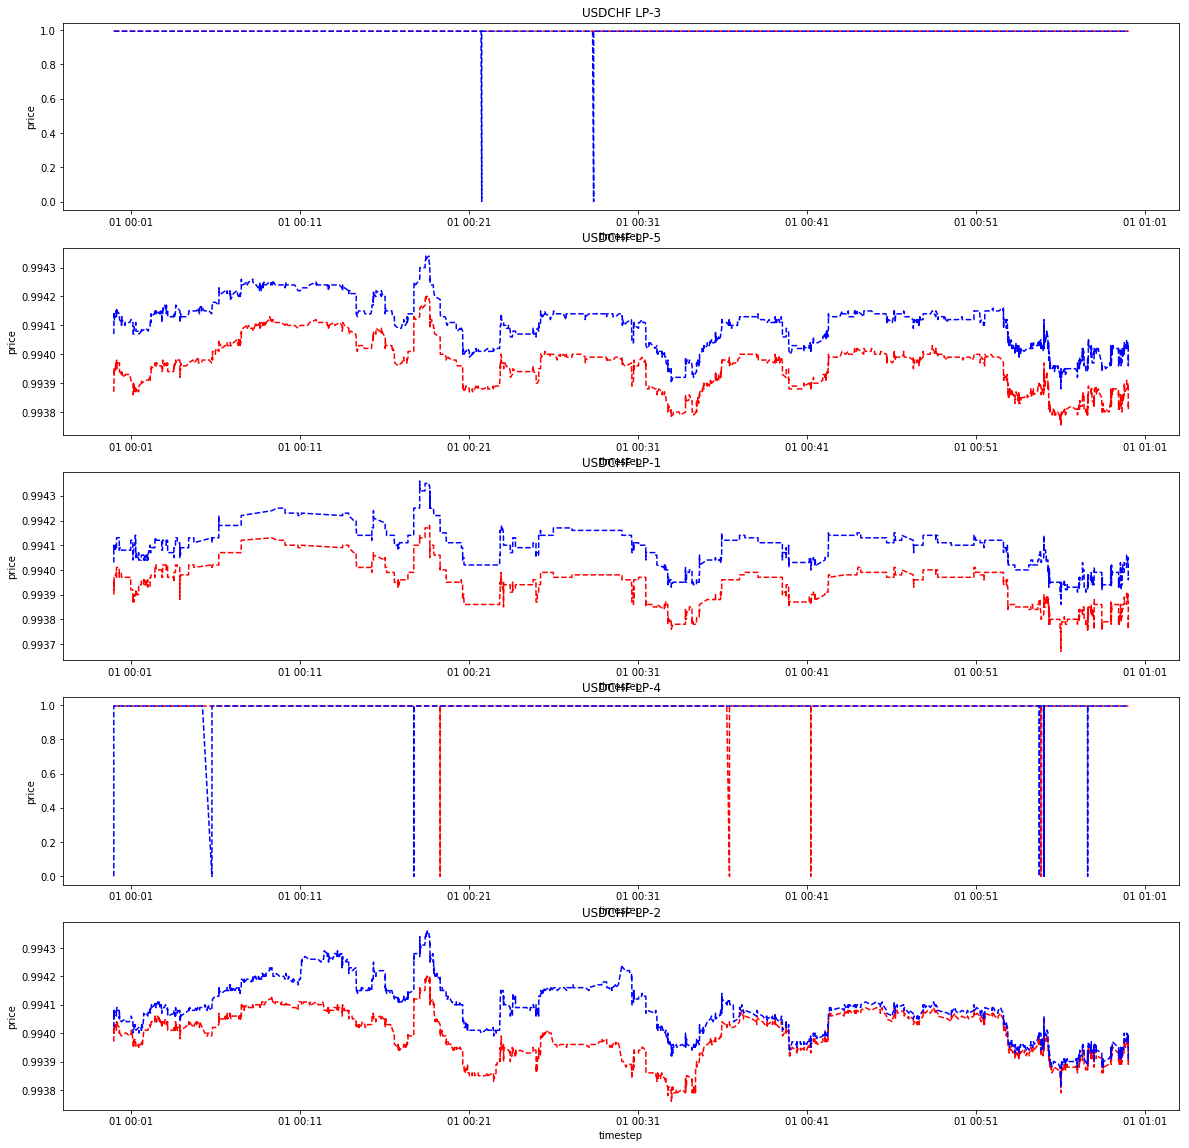

In [37]:
cur = 'USDCHF'
fig = plt.figure()
gs = gridspec.GridSpec(len(providers),1)
for n in range(len(providers)):
    title = cur + " " + providers[n]
    ax = fig.add_subplot(gs[n, 0]) 
    tmp = LP[LP.provider == providers[n]]
    tmp = tmp[tmp['currency pair'] == cur]
    t = tmp.time.values
    b = tmp['bid price'].values
    a = tmp['ask price'].values
    ax.plot(t, b, 'r--', t, a, 'b--')
    ax.set(xlabel='timestep', ylabel='price')
    ax.set_title(title)

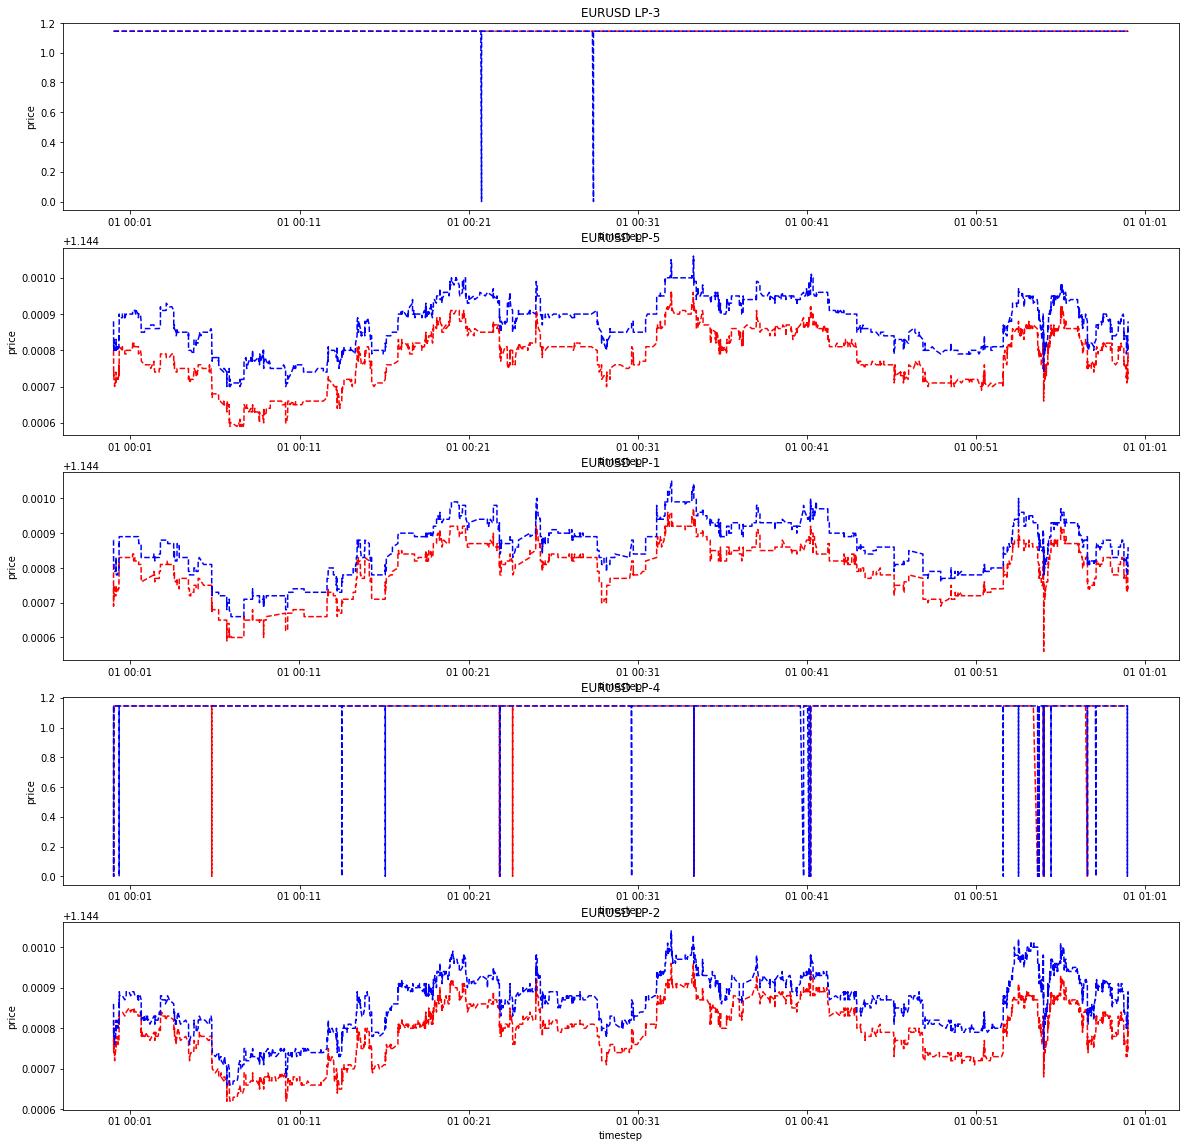

In [38]:
cur = 'EURUSD'
fig = plt.figure()
gs = gridspec.GridSpec(len(providers),1)
for n in range(len(providers)):
    title = cur + " " + providers[n]
    ax = fig.add_subplot(gs[n, 0]) 
    tmp = LP[LP.provider == providers[n]]
    tmp = tmp[tmp['currency pair'] == cur]
    t = tmp.time.values
    b = tmp['bid price'].values
    a = tmp['ask price'].values
    ax.plot(t, b, 'r--', t, a, 'b--')
    ax.set(xlabel='timestep', ylabel='price')
    ax.set_title(title)

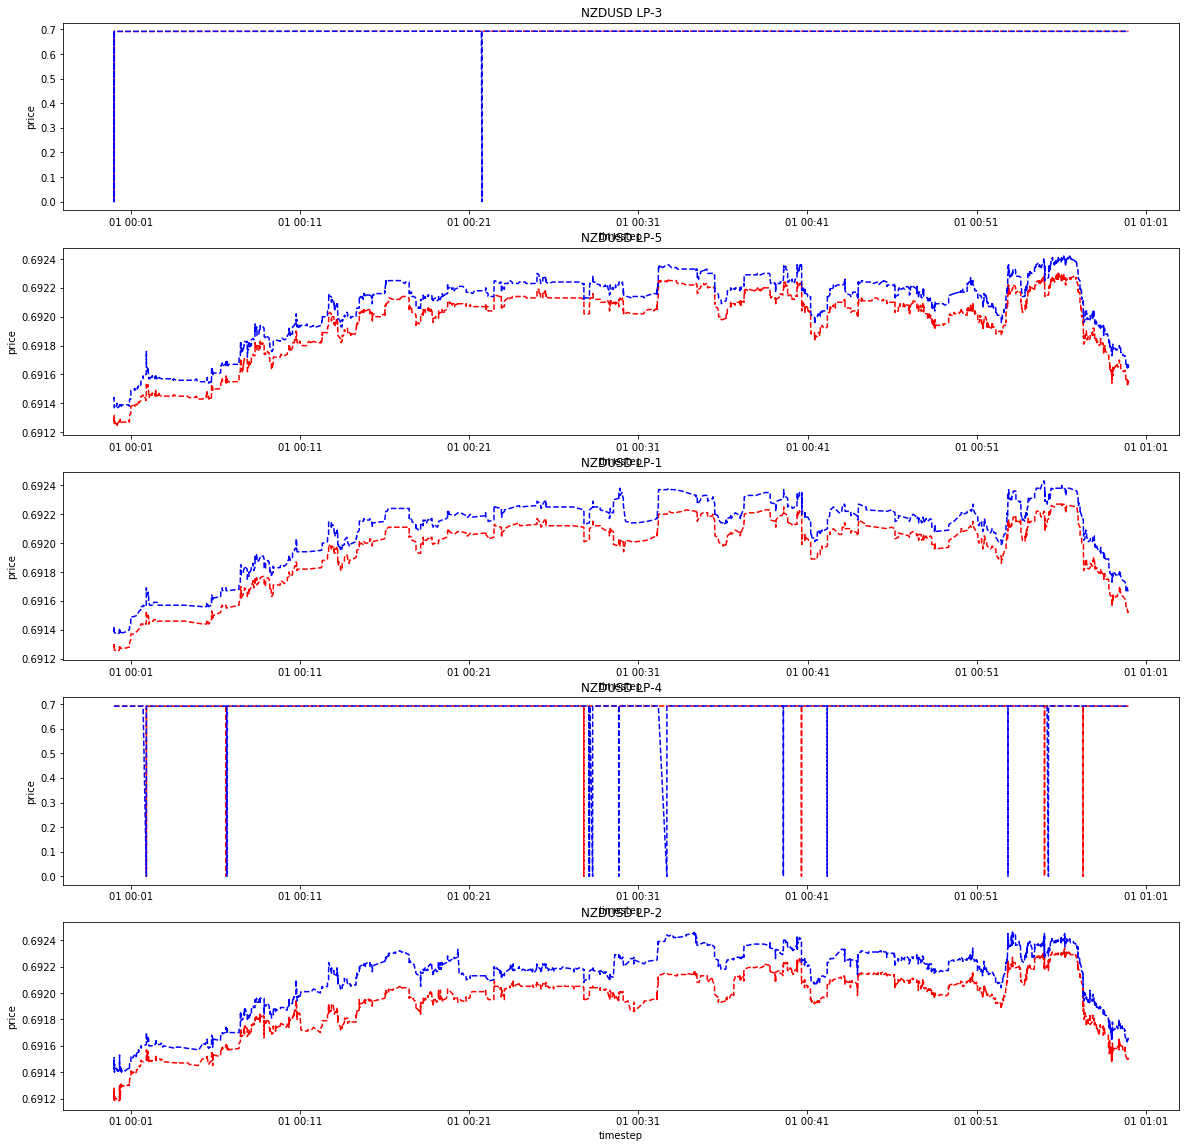

In [39]:
cur = 'NZDUSD'
fig = plt.figure()
gs = gridspec.GridSpec(len(providers),1)
for n in range(len(providers)):
    title = cur + " " + providers[n]
    ax = fig.add_subplot(gs[n, 0]) 
    tmp = LP[LP.provider == providers[n]]
    tmp = tmp[tmp['currency pair'] == cur]
    t = tmp.time.values
    b = tmp['bid price'].values
    a = tmp['ask price'].values
    ax.plot(t, b, 'r--', t, a, 'b--')
    ax.set(xlabel='timestep', ylabel='price')
    ax.set_title(title)

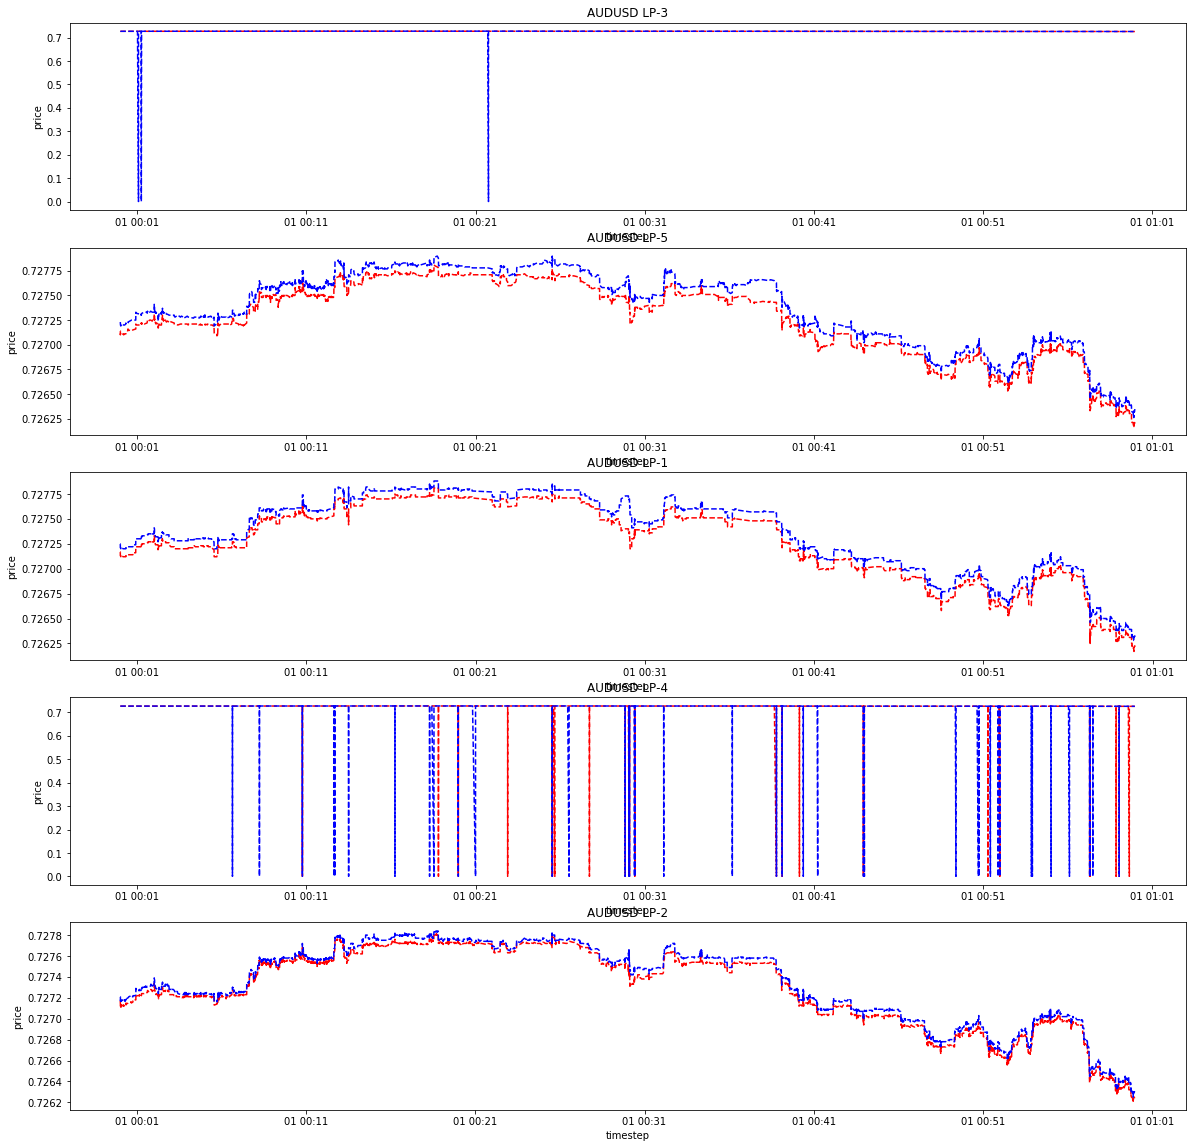

In [40]:
cur = 'AUDUSD'
fig = plt.figure()
gs = gridspec.GridSpec(len(providers),1)
for n in range(len(providers)):
    title = cur + " " + providers[n]
    ax = fig.add_subplot(gs[n, 0]) 
    tmp = LP[LP.provider == providers[n]]
    tmp = tmp[tmp['currency pair'] == cur]
    t = tmp.time.values
    b = tmp['bid price'].values
    a = tmp['ask price'].values
    ax.plot(t, b, 'r--', t, a, 'b--')
    ax.set(xlabel='timestep', ylabel='price')
    ax.set_title(title)

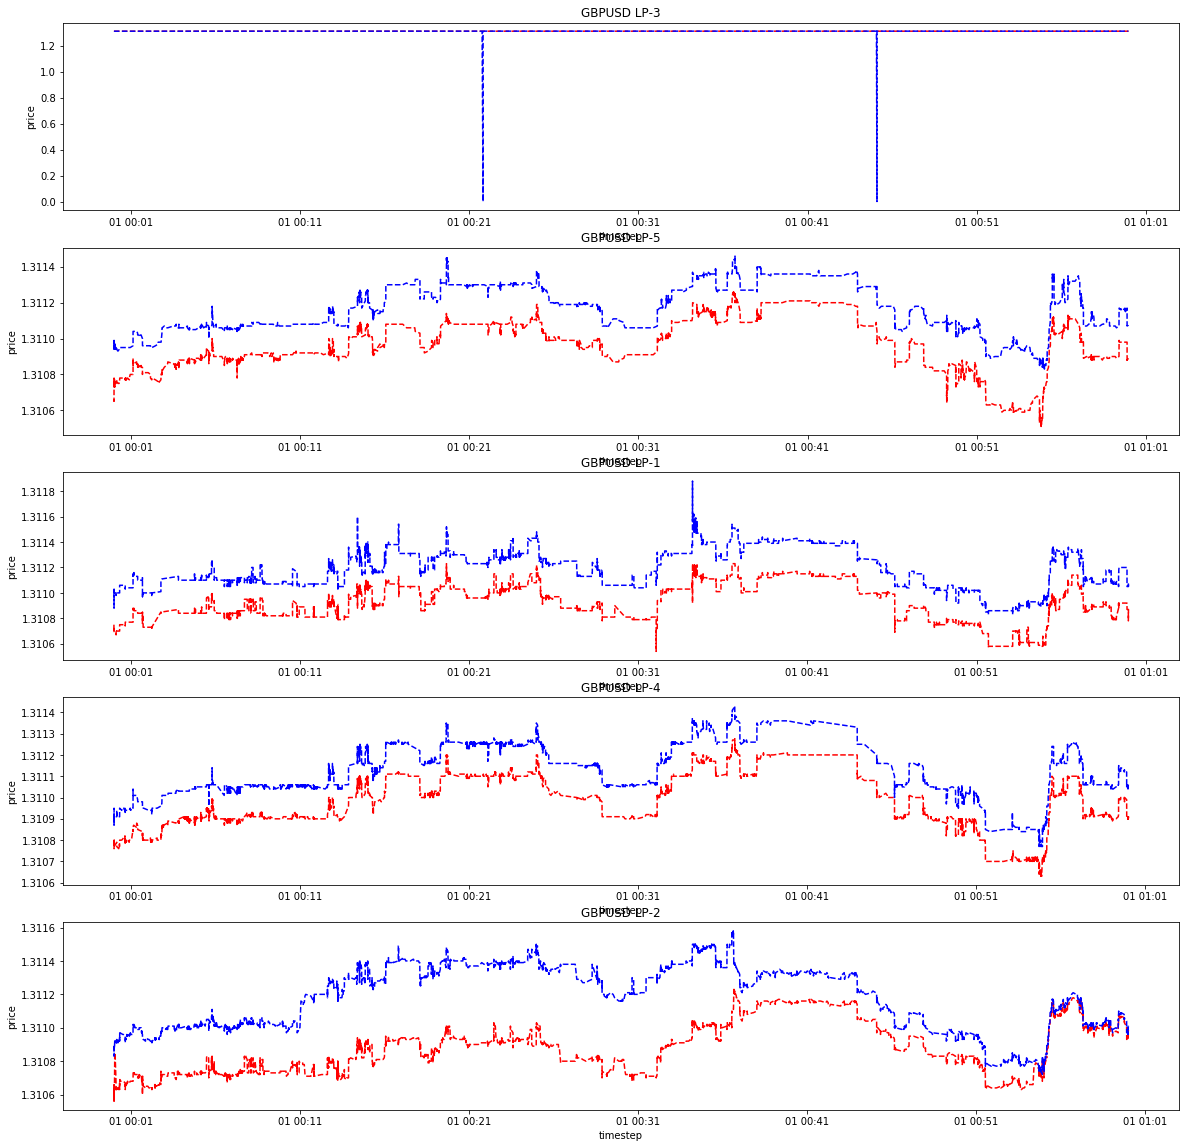

In [41]:
cur = 'GBPUSD'
fig = plt.figure()
gs = gridspec.GridSpec(len(providers),1)
for n in range(len(providers)):
    title = cur + " " + providers[n]
    ax = fig.add_subplot(gs[n, 0]) 
    tmp = LP[LP.provider == providers[n]]
    tmp = tmp[tmp['currency pair'] == cur]
    t = tmp.time.values
    b = tmp['bid price'].values
    a = tmp['ask price'].values
    ax.plot(t, b, 'r--', t, a, 'b--')
    ax.set(xlabel='timestep', ylabel='price')
    ax.set_title(title)

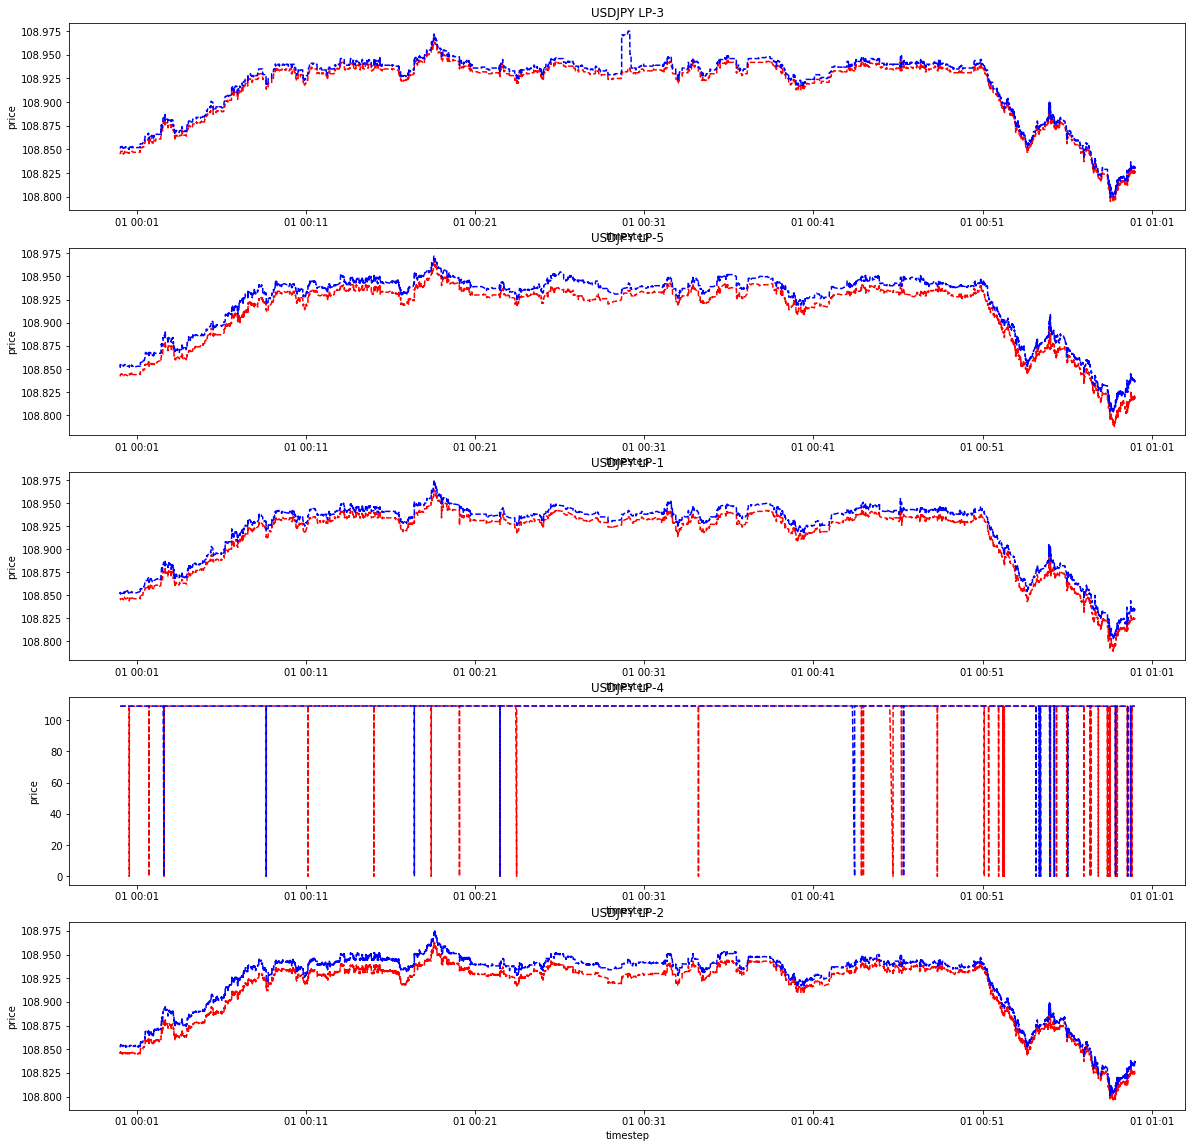

In [42]:
cur = 'USDJPY'
fig = plt.figure()
gs = gridspec.GridSpec(len(providers),1)
for n in range(len(providers)):
    title = cur + " " + providers[n]
    ax = fig.add_subplot(gs[n, 0]) 
    tmp = LP[LP.provider == providers[n]]
    tmp = tmp[tmp['currency pair'] == cur]
    t = tmp.time.values
    b = tmp['bid price'].values
    a = tmp['ask price'].values
    ax.plot(t, b, 'r--', t, a, 'b--')
    ax.set(xlabel='timestep', ylabel='price')
    ax.set_title(title)

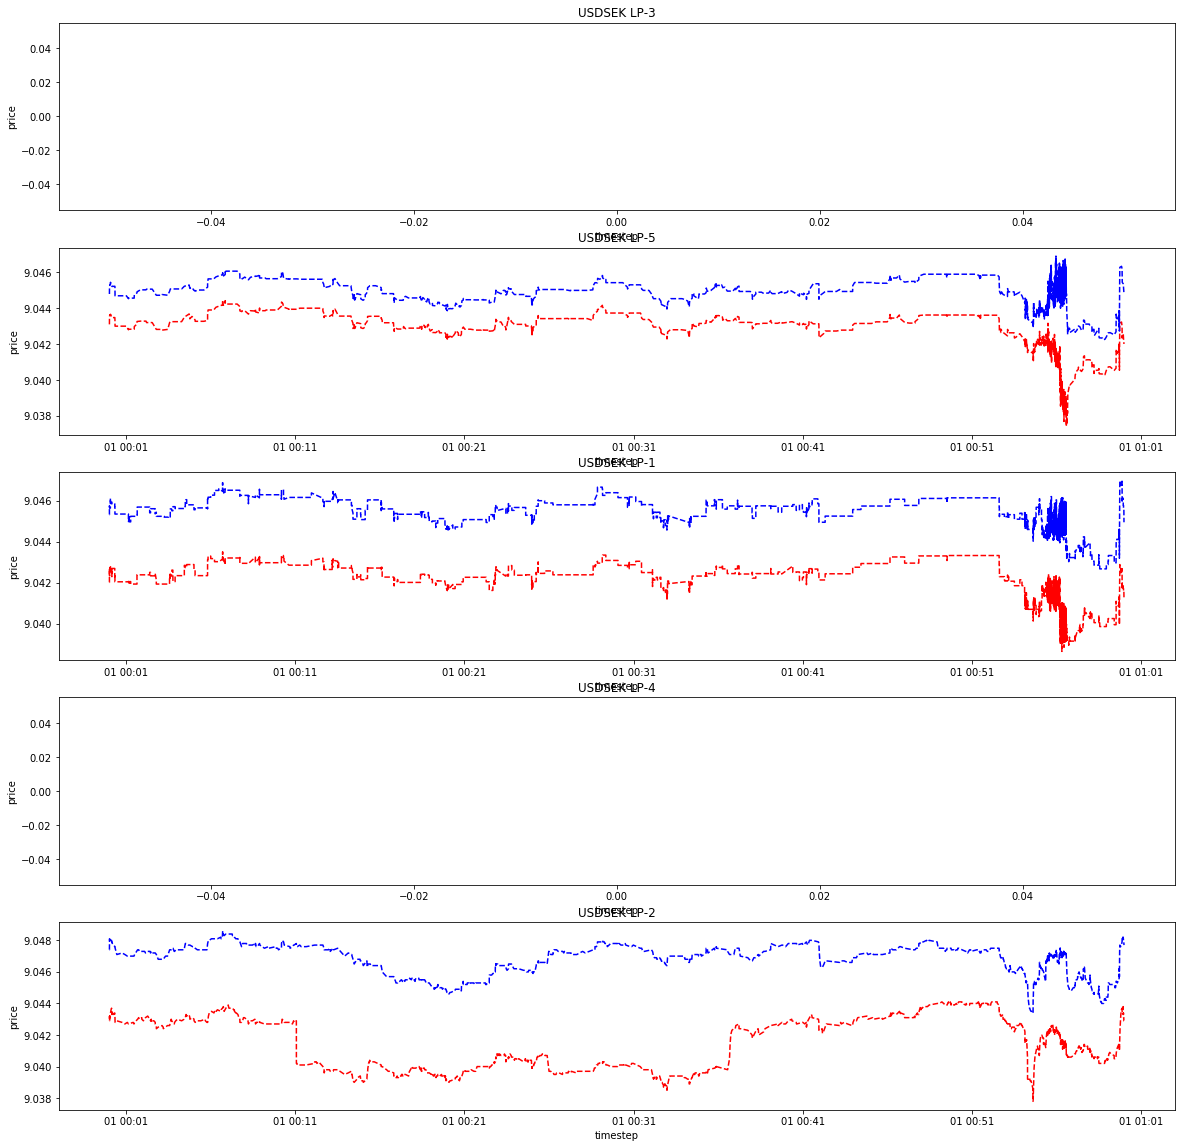

In [43]:
cur = 'USDSEK'
fig = plt.figure()
gs = gridspec.GridSpec(len(providers),1)
for n in range(len(providers)):
    title = cur + " " + providers[n]
    ax = fig.add_subplot(gs[n, 0]) 
    tmp = LP[LP.provider == providers[n]]
    tmp = tmp[tmp['currency pair'] == cur]
    t = tmp.time.values
    b = tmp['bid price'].values
    a = tmp['ask price'].values
    ax.plot(t, b, 'r--', t, a, 'b--')
    ax.set(xlabel='timestep', ylabel='price')
    ax.set_title(title)

In [14]:
LP['spread'] = LP['ask price']-LP['bid price']
for m in range(len(CCY)):
    for n in range(len(providers)):
        tmp = LP[LP.provider == providers[n]]
        tmp = tmp[tmp['currency pair'] == CCY[m]]
        print(CCY[m], " ",providers[n])
        print(tmp['spread'].describe())

USDCAD   LP-3
count    3757.000000
mean       -0.000247
std         0.021417
min        -1.312650
25%         0.000090
50%         0.000100
75%         0.000110
max         0.000450
Name: spread, dtype: float64
USDCAD   LP-5
count    1992.000000
mean        0.000166
std         0.000022
min         0.000120
25%         0.000150
50%         0.000160
75%         0.000180
max         0.000260
Name: spread, dtype: float64
USDCAD   LP-1
count    2490.000000
mean        0.000121
std         0.000031
min         0.000040
25%         0.000110
50%         0.000110
75%         0.000120
max         0.000370
Name: spread, dtype: float64
USDCAD   LP-4
count    3049.000000
mean        0.006157
std         0.121074
min        -1.312620
25%         0.000120
50%         0.000130
75%         0.000140
max         1.312840
Name: spread, dtype: float64
USDCAD   LP-2
count    2667.000000
mean        0.000101
std         0.000074
min         0.000040
25%         0.000050
50%         0.000060
75%         0.00

### TrueFX

In [16]:
TrueFX = pd.read_csv('TrueFX.csv')
TrueFX = TrueFX.drop(columns=['Unnamed: 0'])
TrueFX['Timestep'] = pd.to_datetime(TrueFX['Timestep'])

In [18]:
CCY = TrueFX['CCY'].unique()
print(CCY)

['EUR/JPY' 'AUD/NZD' 'GBP/JPY' 'EUR/CHF' 'GBP/USD' 'CAD/JPY' 'CHF/JPY'
 'EUR/USD' 'AUD/JPY' 'USD/CHF' 'AUD/USD' 'USD/CAD' 'NZD/USD' 'USD/JPY']


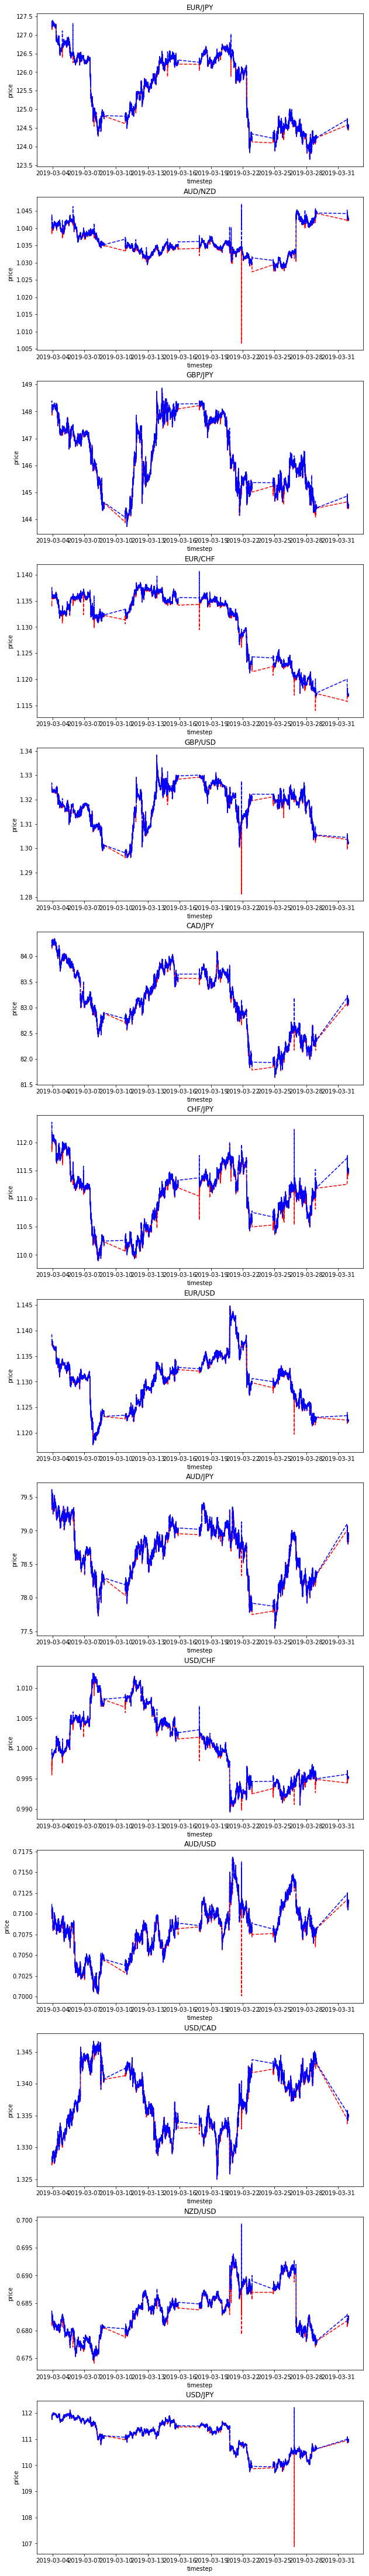

In [19]:
fig = plt.figure()
gs = gridspec.GridSpec(len(CCY),1)
for n in range(len(CCY)):
    title = CCY[n]
    ax = fig.add_subplot(gs[n, 0]) 
    tmp = TrueFX[TrueFX['CCY'] == CCY[n]]
    t = tmp.Timestep.values
    b = tmp['Bid'].values
    a = tmp['Ask'].values
    ax.plot(t, b, 'r--', t, a, 'b--')
    ax.set(xlabel='timestep', ylabel='price')
    ax.set_title(title)